In [ ]:
import os
import glob

download_from_allen = False
if download_from_allen:
    from allensdk.api.queries.biophysical_api import BiophysicalApi

    bp = BiophysicalApi()
    bp.cache_stimulus = False
    neuronal_model_id = 472451419   
    bp.cache_data(neuronal_model_id)
    
working_dir = os.getcwd()
json_files = glob.glob(os.path.join(working_dir, "*fit.json"))
swc_files = glob.glob(os.path.join(working_dir, "m.swc"))
dynamic_params = json_files[0]
morphology = swc_files[0]
print(dynamic_params)
print(morphology)

_ = os.system('nrnivmodl modfiles')

/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/386049446_fit.json
/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell/Nr5a1-Cre_Ai14-177334.05.01.01_491459171_m.swc


/home/gjgpb9/cortex_modeling/bmtool/examples/single_cell
Mod files: "modfiles/modfiles/CaDynamics.mod" "modfiles/modfiles/Ca_HVA.mod" "modfiles/modfiles/Ca_LVA.mod" "modfiles/modfiles/Ih.mod" "modfiles/modfiles/Im.mod" "modfiles/modfiles/Im_v2.mod" "modfiles/modfiles/Kd.mod" "modfiles/modfiles/K_P.mod" "modfiles/modfiles/K_T.mod" "modfiles/modfiles/Kv2like.mod" "modfiles/modfiles/Kv3_1.mod" "modfiles/modfiles/Nap.mod" "modfiles/modfiles/NaTa.mod" "modfiles/modfiles/NaTs.mod" "modfiles/modfiles/NaV.mod" "modfiles/modfiles/SK.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so


/home/gjgpb9/miniconda3/envs/bmtk/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


Successfully created x86_64/special


--No graphics will be displayed.


NEURON mechanisms not found in modfiles.
Injection location: Biophys1[0].soma[0](0.5)
Recording: Biophys1[0].soma[0](0.5)._ref_v
Current clamp simulation running...

Number of spikes: 12



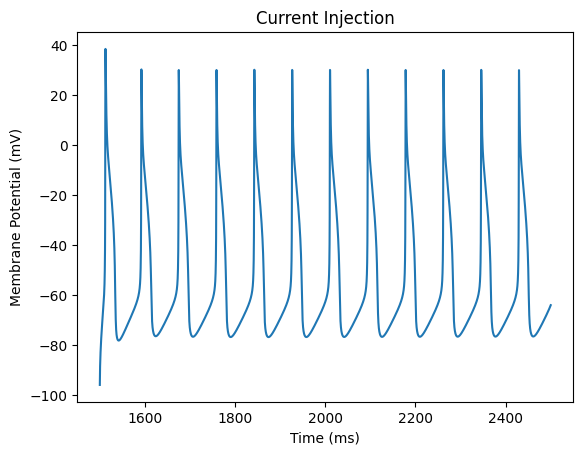

In [2]:
from bmtool.singlecell import CurrentClamp,run_and_plot,Profiler,load_allen_database_cells
import matplotlib.pyplot as plt

cell_creater = load_allen_database_cells(morphology=morphology,
                                 dynamic_params=dynamic_params)

profiler = Profiler(template_dir='.', mechanism_dir = 'modfiles', dt=0.1)

sim = CurrentClamp(cell_creater, inj_amp=350., inj_delay=1500., inj_dur=1000., tstop=3000., threshold=-15.)

X, Y = run_and_plot(sim, title='Current Injection', xlabel='Time (ms)',
                    ylabel='Membrane Potential (mV)', plot_injection_only=True)
plt.show()
